# Customer Segmentation

# About Dataset

## Context

A real online retail transaction data set of two years:
https://archive.ics.uci.edu/ml/datasets/Online+Retail+II


## Content

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.


## Column Descriptors

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal. The name of the country where a customer resides.

# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

In [2]:
df= pd.read_csv("online_retail_II.csv")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# Exploratory Data Analysis and Preprocessing

In [3]:
df.shape

(1067371, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Checking null data...

In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
#Let's drop the rows containing NaN
df.dropna(inplace=True)

Checking duplicate rows...

In [7]:
df[df.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067136,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
1067150,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067153,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
1067160,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [8]:
len(df[df.duplicated()])

26479

There are 26479 duplicate rows, let's drop them:

In [9]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [10]:
df.shape

(797885, 8)

In [11]:
# no "NULL" and "duplicate" data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


In [12]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# Handling columns

Let's create a new feature: "TotalPrice"

In [13]:
df1= df.copy()
df1["TotalPrice"] = df1["Quantity"] * df1["Price"]

In [14]:
for i in df1.columns:
    print(i, "column, unique values: ", df1[i].unique())
    print("************")
    print("")

Invoice column, unique values:  ['489434' '489435' '489436' ... '581585' '581586' '581587']
************

StockCode column, unique values:  ['85048' '79323P' '79323W' ... '23562' '23561' '23843']
************

Description column, unique values:  ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'SILVER AND BLACK ORBIT NECKLACE'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
************

Quantity column, unique values:  [    12     48     24     10     18      3     16      4      2      6
      8      1     28     30     60     32     56      9     25     36
     20    -12     -6     -4    -24     -3     -2    576    288     27
     64    160      5     -1     72     50     54      7    800     11
     58    192     96    144    100    180    216     15    240    108
     33     90     81    -81    -48     17     -5     40     -8     -9
     13     21    120    200    168     19    280    128   -150    -18
    -23     80    3

In [15]:
for i in df1.columns:
    print(i, "column, unique values: ", df1[i].nunique())
    print("************")
    print("")

Invoice column, unique values:  44876
************

StockCode column, unique values:  4646
************

Description column, unique values:  5299
************

Quantity column, unique values:  643
************

InvoiceDate column, unique values:  41439
************

Price column, unique values:  1022
************

Customer ID column, unique values:  5942
************

Country column, unique values:  41
************

TotalPrice column, unique values:  5625
************



Observed some negative values the Quantity and Price columns.
Let's check the value containing 0 in the Quantity and Price columns:

In [16]:
df1.shape

(797885, 9)

In [17]:
df1.loc[(df1["Quantity"]<=0) | (df1["Price"]<=0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


Let's drop them...

In [18]:
df2= df1[(df1['Price'] > 0)]

In [19]:
df2= df2[(df2['Quantity'] > 0)]

In [20]:
df1.shape

(797885, 9)

In [21]:
df2.shape

(779425, 9)

In [22]:
df2.loc[(df2["Quantity"]<=0) | (df2["Price"]<=0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice


Let's find the non-numeric stock codes:

In [23]:
# ALL ONLY non-numeric stock codes
wrong_stock_codes= df2[df2["StockCode"].astype(str).str.contains(r"^[a-zA-Z''-'\s]{1,40}$")]["StockCode"].unique().tolist()
df2[df2["StockCode"].isin(wrong_stock_codes)].groupby(["StockCode"]).agg({"StockCode": "count"})

,StockCode
StockCode,
ADJUST,32
BANK CHARGES,31
D,5
DOT,16
M,681
PADS,17
POST,1803


In [24]:
#total rows 2585
df2[df2["StockCode"].isin(wrong_stock_codes)].groupby(["StockCode"]).agg({"StockCode": "count"}).sum()

StockCode    2585
dtype: int64

Let's drop them:

In [25]:
df2= df2[~df2["StockCode"].isin(wrong_stock_codes)].reset_index(drop=True)

In [26]:
# Other non-numeric stock codes
wrong_stock_codes2= df2[df2["StockCode"].astype(str).str.contains(r"[a-zA-Z]{3,}")]["StockCode"].unique().tolist()
df2[df2["StockCode"].isin(wrong_stock_codes2)].groupby(["StockCode"]).agg({"StockCode": "count"})

,StockCode
StockCode,
ADJUST2,3
TEST001,9
TEST002,1


In [27]:
#total rows 2585
df2[df2["StockCode"].isin(wrong_stock_codes2)].groupby(["StockCode"]).agg({"StockCode": "count"}).sum()

StockCode    13
dtype: int64

Let's drop them:

In [28]:
df2= df2[~df2["StockCode"].isin(wrong_stock_codes2)].reset_index(drop=True)

In [29]:
df2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
776822,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
776823,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
776824,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
776825,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776827 entries, 0 to 776826
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      776827 non-null  object 
 1   StockCode    776827 non-null  object 
 2   Description  776827 non-null  object 
 3   Quantity     776827 non-null  int64  
 4   InvoiceDate  776827 non-null  object 
 5   Price        776827 non-null  float64
 6   Customer ID  776827 non-null  float64
 7   Country      776827 non-null  object 
 8   TotalPrice   776827 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 53.3+ MB


Let's convert the type of column "InvoiceDate" to pandas datetime

In [31]:
df2.InvoiceDate = pd.to_datetime(df2.InvoiceDate)

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776827 entries, 0 to 776826
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      776827 non-null  object        
 1   StockCode    776827 non-null  object        
 2   Description  776827 non-null  object        
 3   Quantity     776827 non-null  int64         
 4   InvoiceDate  776827 non-null  datetime64[ns]
 5   Price        776827 non-null  float64       
 6   Customer ID  776827 non-null  float64       
 7   Country      776827 non-null  object        
 8   TotalPrice   776827 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 53.3+ MB


# Handling Outliers

Outliers in the columns considered:

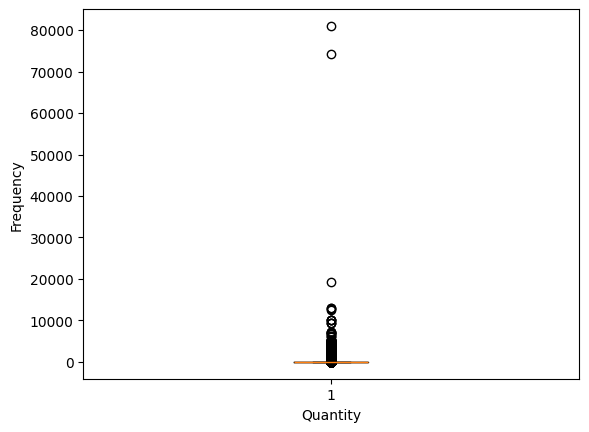

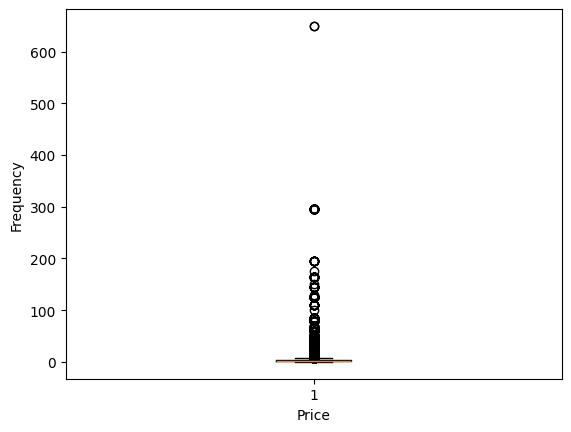

In [33]:
for i in ["Quantity", "Price"]:
    plt.figure()
    plt.tight_layout()
    plt.gca().set(xlabel= i, ylabel='Frequency')
    plt.boxplot(df2[i])

Number of outliers in the columns considered:

In [34]:
def num_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return print("Number of outliers in {} column: ".format(col_name), len(outliers_df)), print("Indexes: ", outliers_df.index)

In [35]:
num_outlier(df2, "Quantity")

Number of outliers in Quantity column:  16486
Indexes:  Index([   192,    198,    256,    531,    855,    856,    858,    859,    862,
          864,
       ...
       776295, 776363, 776366, 776386, 776476, 776485, 776499, 776626, 776635,
       776666],
      dtype='int64', length=16486)


(None, None)

In [36]:
num_outlier(df2, "Price")

Number of outliers in Price column:  1598
Indexes:  Index([  1200,   1248,   1578,   1618,   1630,   1830,   2547,   2943,   3578,
         4660,
       ...
       768741, 768742, 768797, 768850, 769012, 771153, 772158, 772162, 774716,
       775856],
      dtype='int64', length=1598)


(None, None)

Let's remove them:

In [37]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1     
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    index_outliers= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].index
    df_in= pd.DataFrame(df_in.drop(index_outliers.to_list(), axis=0, inplace=True))
    print("Outliers in the {} column have been removed".format(col_name))
    return df_in

In [38]:
df2.shape

(776827, 9)

In [39]:
remove_outlier(df2, "Quantity")

Outliers in the Quantity column have been removed


""


In [40]:
df2.shape

(760341, 9)

In [41]:
remove_outlier(df2, "Price")

Outliers in the Price column have been removed


""


In [42]:
df2.shape

(758744, 9)

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 758744 entries, 0 to 776826
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      758744 non-null  object        
 1   StockCode    758744 non-null  object        
 2   Description  758744 non-null  object        
 3   Quantity     758744 non-null  int64         
 4   InvoiceDate  758744 non-null  datetime64[ns]
 5   Price        758744 non-null  float64       
 6   Customer ID  758744 non-null  float64       
 7   Country      758744 non-null  object        
 8   TotalPrice   758744 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 57.9+ MB


## RFM Analysis (recency, frequency, monetary)

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. The system assigns each customer numerical scores based on these factors to provide an objective analysis. RFM analysis is based on the marketing adage that "80% of your business comes from 20% of your customers."

RFM analysis ranks each customer on the following factors:

**Recency**. How recent was the customer's last purchase? Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again. Businesses often measure recency in days. But, depending on the product, they may measure it in years, weeks or even hours.

**Frequency**. How often did this customer make a purchase in a given period? Customers who purchased once are often are more likely to purchase again. Additionally, first time customers may be good targets for follow-up advertising to convert them into more frequent customers.

**Monetary**. How much money did the customer spend in a given period? Customers who spend a lot of money are more likely to spend money in the future and have a high value to a business.

Source: https://www.techtarget.com/searchdatamanagement/definition/RFM-analysis

In [44]:
print("Latest date in dataset: ", df2["InvoiceDate"].max())

Latest date in dataset:  2011-12-09 12:50:00


Let's determine current date (3 days after the last date):

In [45]:
current_date = df2["InvoiceDate"].max() + dt.timedelta(days=3)
current_date

Timestamp('2011-12-12 12:50:00')

In [46]:
df2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
776822,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
776823,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
776824,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
776825,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [47]:
RFM= df2.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (current_date - InvoiceDate.max()).days, #recency
                                     'Invoice':     lambda Invoice: Invoice.nunique(), #frequency
                                     'TotalPrice':  lambda TotalPrice: TotalPrice.sum()}) #monetary

RFM.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.0,531,2,169.36
12347.0,4,8,4671.93
12348.0,251,4,816.24
12349.0,21,3,3498.94
12350.0,312,1,294.40


Let's change column names in RFM data frame

In [48]:
RFM.columns=['recency', 'frequency', 'monetary']

In [49]:
RFM.describe()

,recency,frequency,monetary
count,5771.000000,5771.000000,5771.000000
mean,202.287818,6.110379,2186.286394
std,208.614515,12.178700,6279.169151
min,3.000000,1.000000,2.900000
25%,28.000000,1.000000,321.600000
50%,97.000000,3.000000,798.330000
75%,381.000000,7.000000,2052.935000
max,741.000000,371.000000,254323.060000


In [50]:
RFM.shape

(5771, 3)

There are 5771 customers

## RFM Scores

In [51]:
RFM["recency_score"]=   pd.qcut(RFM['recency'], 5, labels=[5, 4, 3, 2, 1])

RFM["frequency_score"]= pd.qcut(RFM['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

RFM["monetary_score"]=  pd.qcut(RFM['monetary'], 5, labels=[1, 2, 3, 4, 5])

Concatanated RFM scores:

In [52]:
RFM['RFM_SCORE'] = RFM.recency_score.astype(str)+ RFM.frequency_score.astype(str) + RFM.monetary_score.astype(str)
RFM

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
Customer ID,,,,,,,
12346.0,531,2,169.36,1,2,1,121
12347.0,4,8,4671.93,5,4,5,545
12348.0,251,4,816.24,2,3,3,233
12349.0,21,3,3498.94,5,3,5,535
12350.0,312,1,294.40,2,1,2,212
...,...,...,...,...,...,...,...
18283.0,6,22,2658.95,5,5,5,555
18284.0,434,1,411.68,1,2,2,122
18285.0,663,1,377.00,1,2,2,122


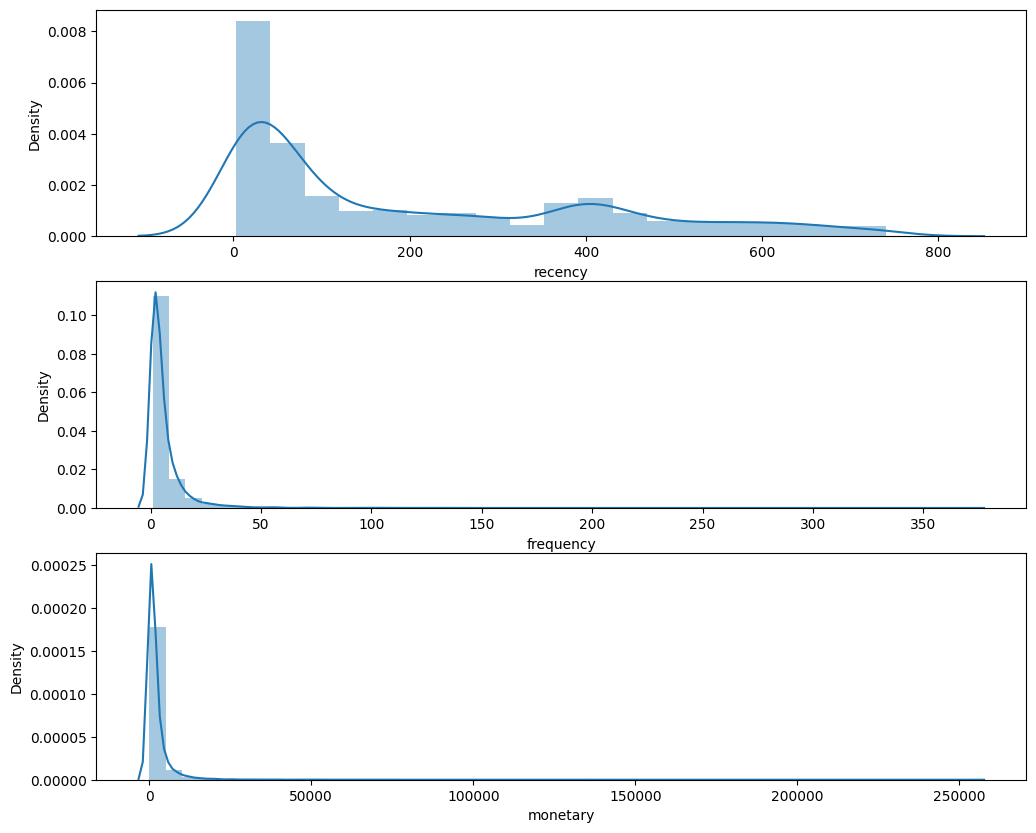

In [53]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(RFM['recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(RFM['frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(RFM['monetary'])
# Show the plot
plt.show()

In [54]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5771 entries, 12346.0 to 18287.0
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   recency          5771 non-null   int64   
 1   frequency        5771 non-null   int64   
 2   monetary         5771 non-null   float64 
 3   recency_score    5771 non-null   category
 4   frequency_score  5771 non-null   category
 5   monetary_score   5771 non-null   category
 6   RFM_SCORE        5771 non-null   object  
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 243.0+ KB


## Clustering Based on RFM

In [55]:
RFM

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
Customer ID,,,,,,,
12346.0,531,2,169.36,1,2,1,121
12347.0,4,8,4671.93,5,4,5,545
12348.0,251,4,816.24,2,3,3,233
12349.0,21,3,3498.94,5,3,5,535
12350.0,312,1,294.40,2,1,2,212
...,...,...,...,...,...,...,...
18283.0,6,22,2658.95,5,5,5,555
18284.0,434,1,411.68,1,2,2,122
18285.0,663,1,377.00,1,2,2,122


In [56]:
RFM2 = RFM.drop(['recency_score', 'frequency_score', 'monetary_score', 'RFM_SCORE'], axis=1)
RFM2

,recency,frequency,monetary
Customer ID,,,
12346.0,531,2,169.36
12347.0,4,8,4671.93
12348.0,251,4,816.24
12349.0,21,3,3498.94
12350.0,312,1,294.40
...,...,...,...
18283.0,6,22,2658.95
18284.0,434,1,411.68
18285.0,663,1,377.00


## Handling outliers

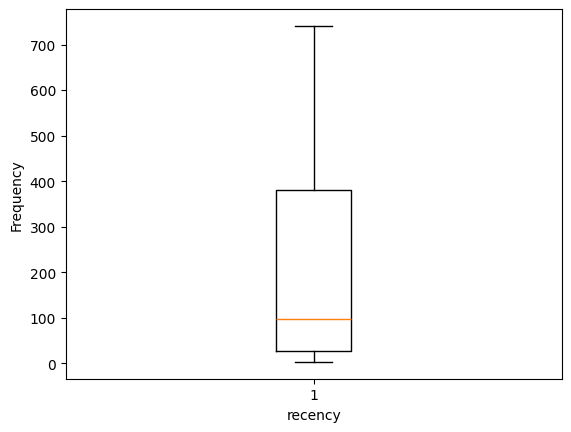

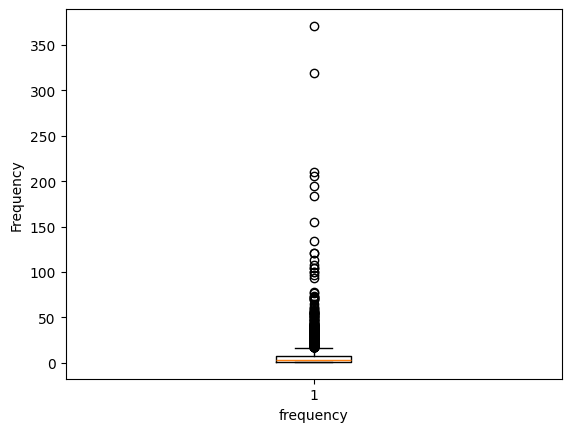

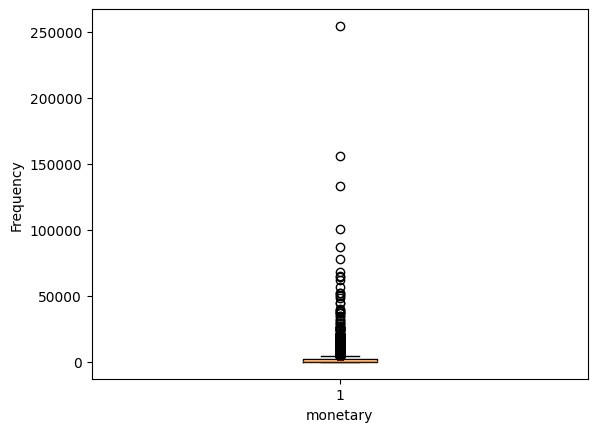

In [57]:
for i in RFM2.columns:
    plt.figure()
    plt.tight_layout()
    plt.gca().set(xlabel= i, ylabel='Frequency')
    plt.boxplot(RFM2[i])

In [58]:
for i in RFM2.columns:
    num_outlier(RFM2, i)
    print("*"*40)

Number of outliers in recency column:  0
Indexes:  Index([], dtype='float64', name='Customer ID')
****************************************
Number of outliers in frequency column:  48
Indexes:  Index([12471.0, 12682.0, 12748.0, 12921.0, 12971.0, 13078.0, 13089.0, 13093.0,
       13199.0, 13319.0, 13408.0, 13468.0, 13694.0, 13767.0, 13777.0, 13798.0,
       14156.0, 14298.0, 14527.0, 14606.0, 14646.0, 14667.0, 14680.0, 14735.0,
       14911.0, 15005.0, 15039.0, 15061.0, 15078.0, 15311.0, 15856.0, 16029.0,
       16133.0, 16168.0, 16422.0, 16779.0, 17243.0, 17377.0, 17389.0, 17511.0,
       17675.0, 17677.0, 17757.0, 17841.0, 17850.0, 17920.0, 17961.0, 18102.0],
      dtype='float64', name='Customer ID')
****************************************
Number of outliers in monetary column:  57
Indexes:  Index([12415.0, 12471.0, 12678.0, 12681.0, 12682.0, 12709.0, 12731.0, 12748.0,
       12921.0, 13001.0, 13078.0, 13081.0, 13089.0, 13093.0, 13098.0, 13319.0,
       13408.0, 13694.0, 13767.0, 137

In [59]:
RFM2.shape

(5771, 3)

We decided to remove outliers that fall with +/- 5% boundaries:

In [60]:
for i in RFM2.columns:
    remove_outlier(RFM2, i)
    print("*"*40)

Outliers in the recency column have been removed
****************************************
Outliers in the frequency column have been removed
****************************************
Outliers in the monetary column have been removed
****************************************


In [61]:
RFM2.shape

(5690, 3)

Let's apply StandardScaler:

In [62]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

RFM2_scaled= scaler.fit_transform(RFM2)
RFM2_scaled

array([[ 1.56157542, -0.51745665, -0.62877303],
       [-0.96208261,  0.45181637,  1.21556989],
       [ 0.22073245, -0.19436565, -0.36379801],
       ...,
       [ 2.19368711, -0.67900216, -0.54371952],
       [ 1.31256173, -0.51745665, -0.21824363],
       [-0.76574489,  0.29027087,  0.99480926]], shape=(5690, 3))

In [63]:
RFM2_scaled_df=pd.DataFrame(RFM2_scaled)
RFM2_scaled_df.columns = ['recency', 'frequency', 'monetary']
RFM2_scaled_df.head()

,recency,frequency,monetary
0,1.561575,-0.517457,-0.628773
1,-0.962083,0.451816,1.215570
2,0.220732,-0.194366,-0.363798
3,-0.880674,-0.355911,0.735090
4,0.512845,-0.679002,-0.577554


# K-means Clustering

In [64]:
from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

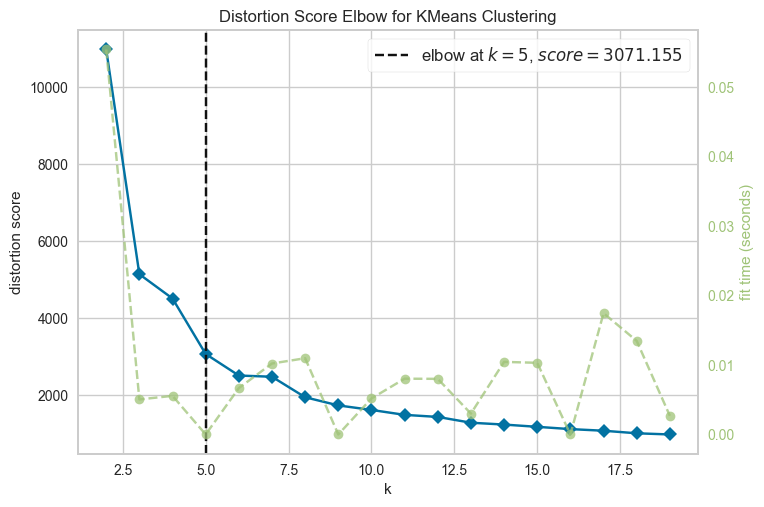

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(2, 20))
elbow.fit(RFM2_scaled_df)
elbow.show()

The optimal K value for Elbow was found to be 5.

In [66]:
kmeans= KMeans(n_clusters=elbow.elbow_value_)
kmeans.fit(RFM2_scaled_df)

KMeans(n_clusters=np.int64(5))

Let's assign the label:

In [67]:
RFM2_scaled_df['Cluster_Id']= kmeans.labels_
RFM2_scaled_df.head()

,recency,frequency,monetary,Cluster_Id
0,1.561575,-0.517457,-0.628773,0
1,-0.962083,0.451816,1.215570,3
2,0.220732,-0.194366,-0.363798,4
3,-0.880674,-0.355911,0.735090,1
4,0.512845,-0.679002,-0.577554,4


In [68]:
RFM2_scaled_df['Cluster_Id'].value_counts()

Cluster_Id
1    2462
4    1391
3     857
0     747
2     233
Name: count, dtype: int64

In [69]:
segments = pd.DataFrame({"Customer": RFM2.index, "Cluster": kmeans.labels_})
segments

,Customer,Cluster
0,12346.0,0
1,12347.0,3
2,12348.0,4
3,12349.0,1
4,12350.0,4
...,...,...
5685,18283.0,3
5686,18284.0,4
5687,18285.0,0
5688,18286.0,4


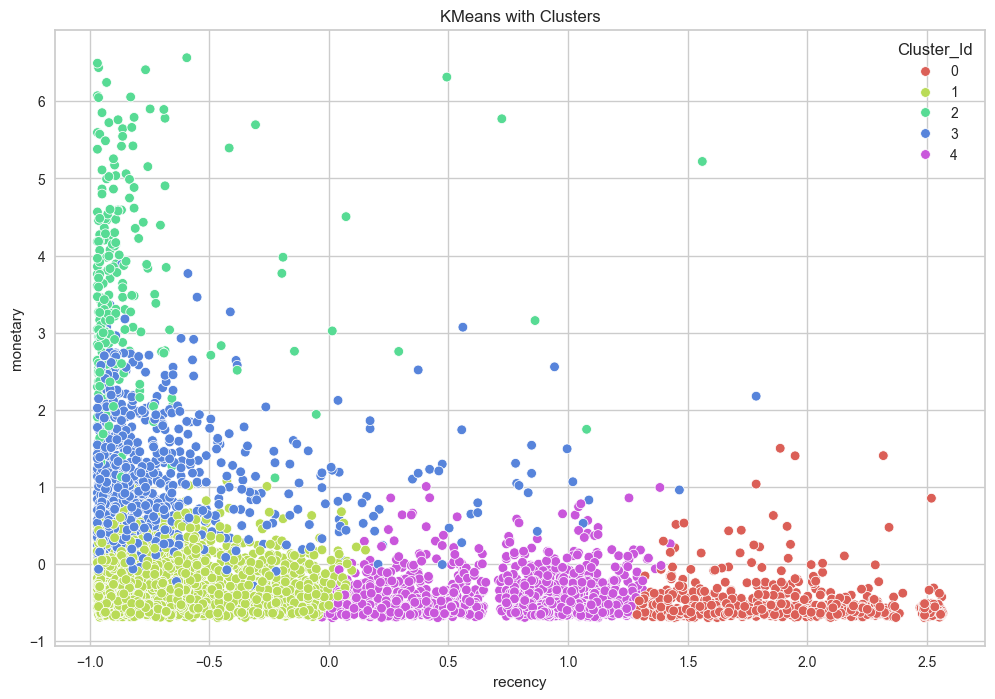

In [70]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=RFM2_scaled_df['recency'], y=RFM2_scaled_df['monetary'], hue=RFM2_scaled_df['Cluster_Id'], 
                palette=sns.color_palette('hls', elbow.elbow_value_))
plt.title('KMeans with Clusters')
plt.show()

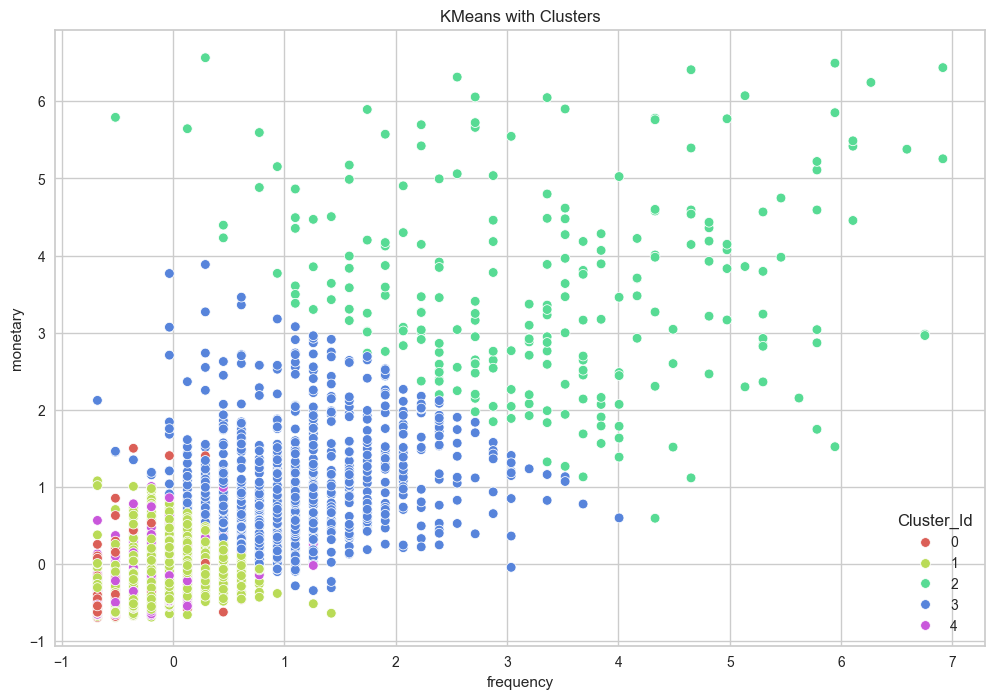

In [71]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=RFM2_scaled_df['frequency'], y=RFM2_scaled_df['monetary'], hue=RFM2_scaled_df['Cluster_Id'], 
                palette=sns.color_palette('hls', elbow.elbow_value_))
plt.title('KMeans with Clusters')
plt.show()

# Hierarchical Agglomerative Clustering 

In [72]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

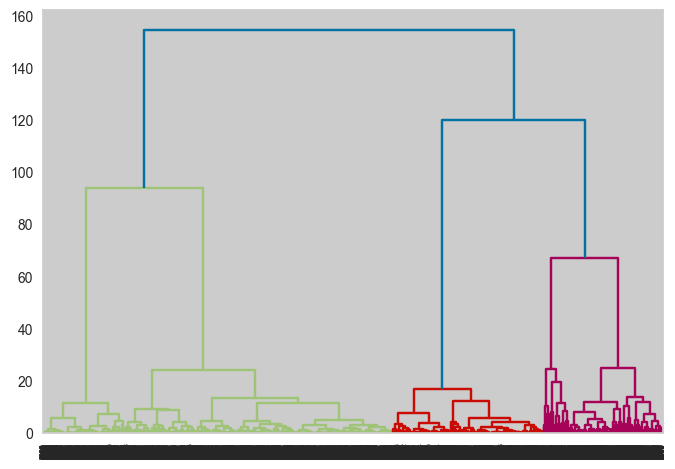

In [73]:
dendrogram = sch.dendrogram(sch.linkage(RFM2_scaled_df, method='ward'))

Find optimal number of clusters from Dendrogram:

For finding the optimal number of clusters we need to :

1. Determine the largest vertical distance that doesn’t intersect any other cluster.
2. Draw two horizontal lines at both extremes like A and B in above figure.
3. The optimal number of cluster = number of vertical lines going through the horizontal lines.

Source= https://medium.com/analytics-vidhya/hierarchical-clustering-agglomerative-f6906d440981

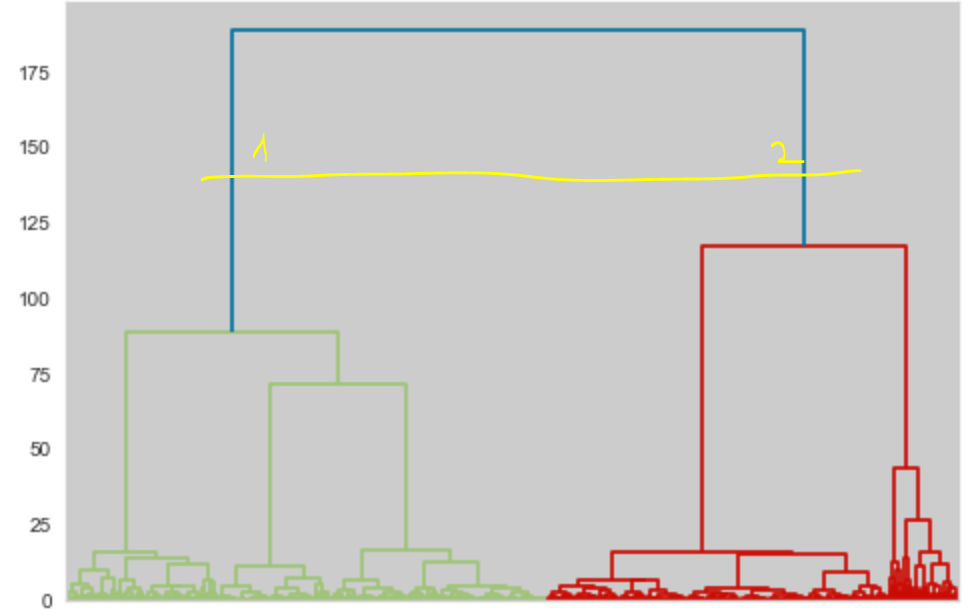

Here, from above Dendrogram we can clearly see that there are 2 vertical lines going through horizontal lines.

Therefore, Optimal number of clusters = 2.

***In fact, it will be discussed later that this method is not a very useful method.***

In [74]:
HAC = AgglomerativeClustering(n_clusters= 2)

In [75]:
segments_HAC = HAC.fit_predict(RFM2_scaled_df)

In [76]:
RFM2_scaled_df["Hierarchi_Clusters"]= segments_HAC

In [77]:
RFM2_scaled_df

,recency,frequency,monetary,Cluster_Id,Hierarchi_Clusters
0,1.561575,-0.517457,-0.628773,0,1
1,-0.962083,0.451816,1.215570,3,0
2,0.220732,-0.194366,-0.363798,4,0
3,-0.880674,-0.355911,0.735090,1,1
4,0.512845,-0.679002,-0.577554,4,0
...,...,...,...,...,...
5685,-0.952505,2.713453,0.391013,3,0
5686,1.097069,-0.679002,-0.529514,4,0
5687,2.193687,-0.679002,-0.543720,0,1
5688,1.312562,-0.517457,-0.218244,4,0


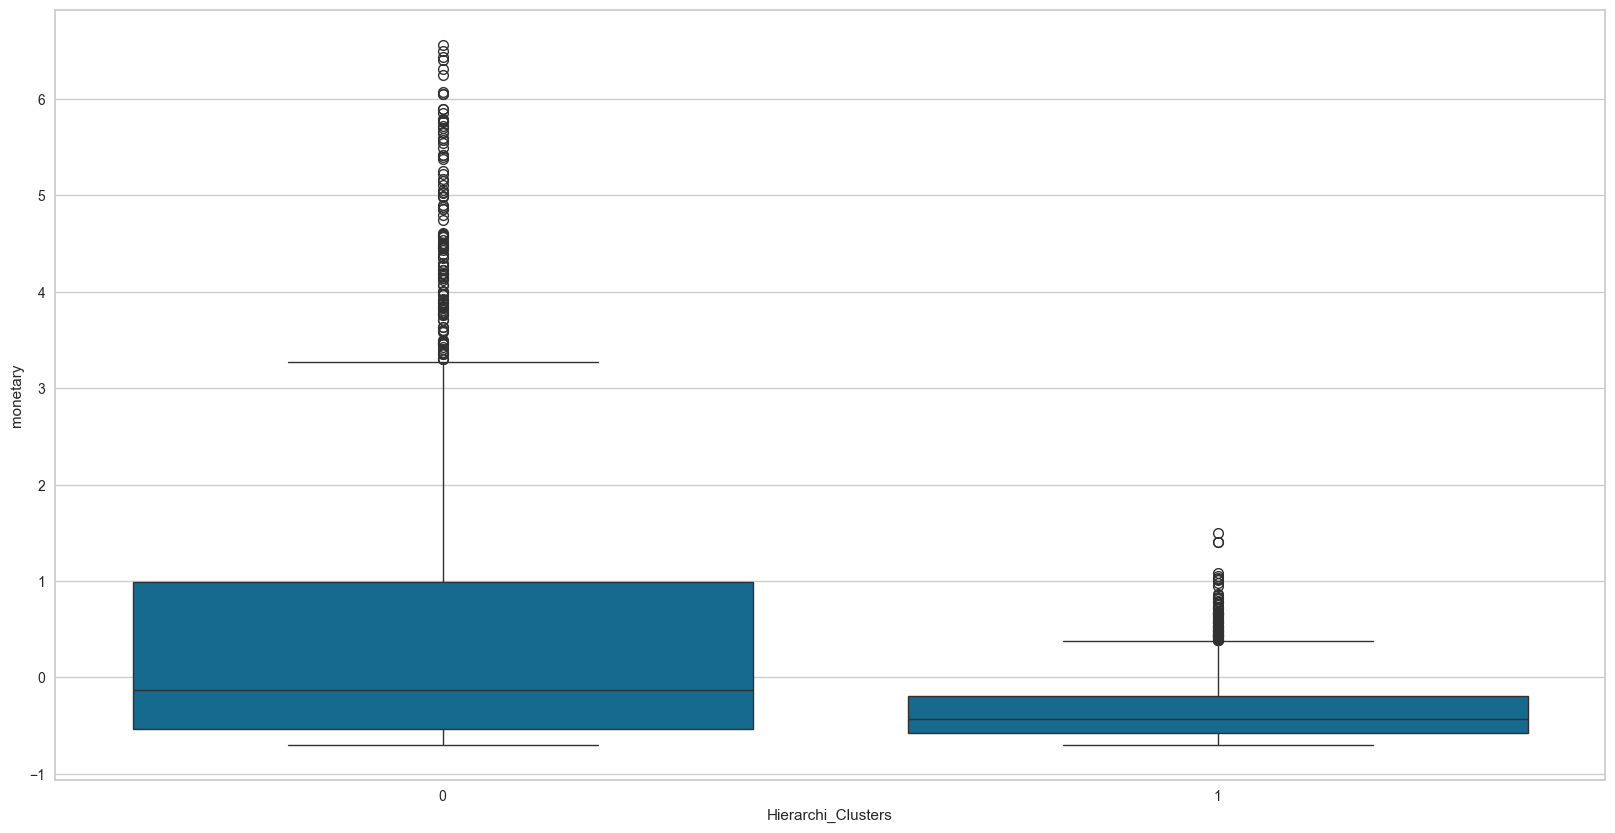

In [78]:
RFM2_scaled_df.groupby("Hierarchi_Clusters").agg({"recency": ["mean", "median", "count"],
                                                  "frequency": ["mean", "median", "count"],
                                                  "monetary": ["mean", "median", "count"]})

plt.figure(figsize=(20, 10))
sns.boxplot(x="Hierarchi_Clusters", y="monetary", data=RFM2_scaled_df)
plt.show()

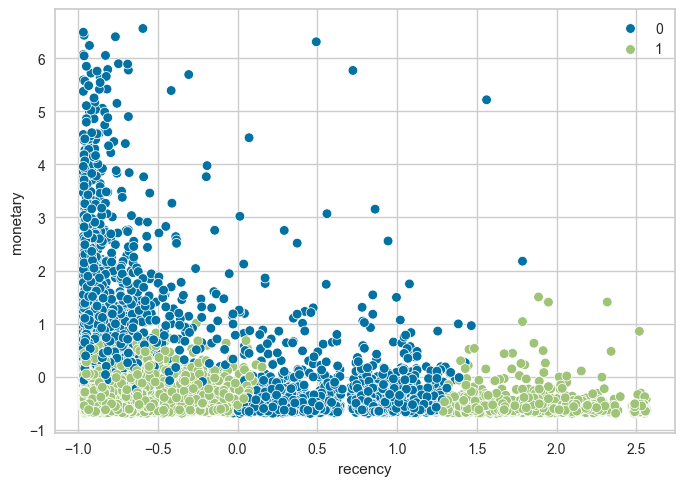

In [79]:
sns.scatterplot(data = RFM2_scaled_df,x=RFM2_scaled_df["recency"], y=RFM2_scaled_df["monetary"],hue=RFM2_scaled_df["Hierarchi_Clusters"])
plt.legend()
plt.show()

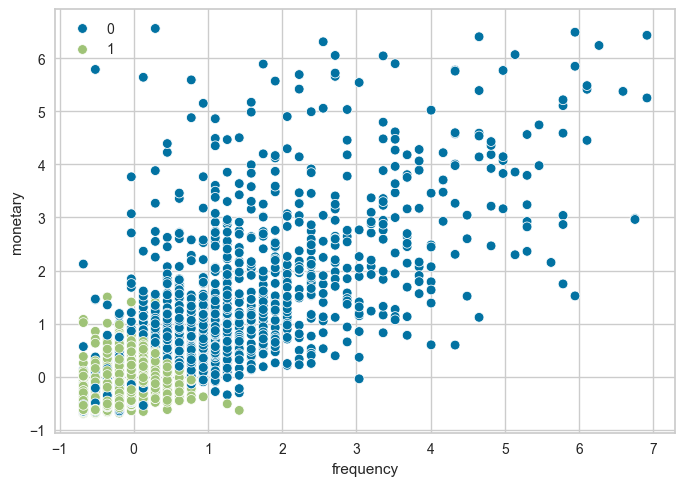

In [80]:
sns.scatterplot(data = RFM2_scaled_df,x=RFM2_scaled_df["frequency"], y=RFM2_scaled_df["monetary"],hue=RFM2_scaled_df["Hierarchi_Clusters"])
plt.legend()
plt.show()

# Model Evaluations

In [81]:
from sklearn import metrics

## Silhouette Score

In [82]:
#Agglemorative
metrics.silhouette_score(RFM2_scaled_df, segments_HAC, metric='euclidean')

np.float64(0.5241374793843917)

In [83]:
#K-Means model
metrics.silhouette_score(RFM2_scaled_df, kmeans.labels_, metric='euclidean')

np.float64(0.7110484363549445)

## Davies-Bouldin Index

Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [84]:
from sklearn.metrics import davies_bouldin_score

In [85]:
#Agglemorative
davies_bouldin_score(RFM2_scaled_df, segments_HAC)

np.float64(0.9680863857805304)

In [86]:
#K-Means model
davies_bouldin_score(RFM2_scaled_df, kmeans.labels_)

np.float64(0.564428302077823)

# Model Tuning

## Silhouette analysis

In [87]:
#K means
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise 
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(RFM2_scaled_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = metrics.silhouette_score(RFM2_scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5241374793843917
For n_clusters=3, the silhouette score is 0.5769256175580701
For n_clusters=4, the silhouette score is 0.697148731538549
For n_clusters=5, the silhouette score is 0.7110484363549445
For n_clusters=6, the silhouette score is 0.6942113137231706
For n_clusters=7, the silhouette score is 0.5530381763407587
For n_clusters=8, the silhouette score is 0.5054664846843155


In [88]:
#Agglomerative Clustering
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise
    HAC= AgglomerativeClustering(n_clusters=num_clusters)
    segments_HAC = HAC.fit_predict(RFM2_scaled_df)
       
    cluster_labels = segments_HAC
    
    # silhouette score
    silhouette_avg = metrics.silhouette_score(RFM2_scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5241374793843917
For n_clusters=3, the silhouette score is 0.6124550882691749
For n_clusters=4, the silhouette score is 0.6974788025379586
For n_clusters=5, the silhouette score is 0.7109033544470335
For n_clusters=6, the silhouette score is 0.6623049154601719
For n_clusters=7, the silhouette score is 0.6634063976482182
For n_clusters=8, the silhouette score is 0.5259850777722997


# Conclusion

The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

According to model tuning, although we infer from Dendrogram that we will use 2 classes for the Agglomerative Clustering model, actually, Both of two model also performed fairly with silhouette score of 0,72 with 6 clusters.

***Thanks for reading. I hope you enjoy it and that it was helpful to you.***

***Please don't forget to follow me and give an upvote on***

**[Kaggle](https://www.kaggle.com/yaseminturker) | [GitHub](https://github.com/yaseminturker) | [Linkedin](https://www.linkedin.com/in/yasemin-turker/) ✌️**